In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


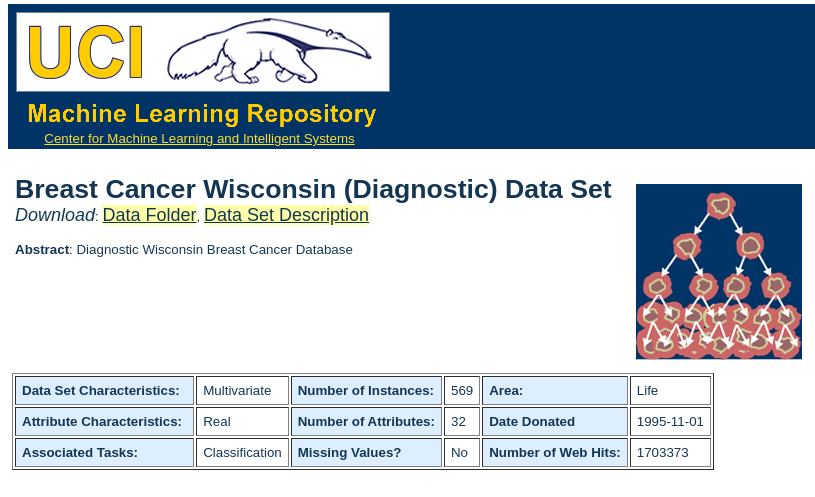

[Webpage](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In this problem we have to use 30 different columns and we have to predict the Stage of Breast Cancer M (Malignant) and B (Bengin).

Repository: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
with open("/content/drive/MyDrive/wdbc.names") as f:
  print(f.read())

#header = pd.read_csv("wdbc.names")


1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

**Cleaning up the data**

In [ ]:
colnames=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
          'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
          'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
          'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
          'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
          'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
          'symmetry_worst', 'fractal_dimension_worst'] 

data = pd.read_csv("/content/drive/MyDrive/wdbc.data", names=colnames, header=None) 

In [ ]:
print(data.head())
print(data.shape)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Id column is not necessary for the analysis

In [ ]:
data.drop("id",axis=1,inplace=True)

The data can be divided into three parts according to their category

In [ ]:
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:21])
features_worst=list(data.columns[21:31])
print(features_mean)
print("---------------------------------------------------------------------")
print(features_se)
print("----------------------------------------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
---------------------------------------------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se']
----------------------------------------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


The *'diagnosis'* column is left - this kind of information will be more useful to process if it was boolean - here I'm mapping the values to integers

"Malignant" is worse than "Benign", so it will be passed 1.

In [ ]:
data['diagnosis']=data['diagnosis'].map({'M':'Malignant','B':'Benign'})

**Exploring the data**

In [ ]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave_points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Taking a look at the frequency of cancer stages

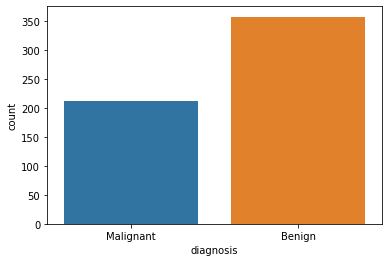

In [ ]:
sns.countplot(data['diagnosis'],label="Count")

In [ ]:
features=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
          'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
          'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
          'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
          'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
          'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
          'symmetry_worst', 'fractal_dimension_worst'] 

The plot suggests that there is a higher number of benign stage of cancer which can be cured.

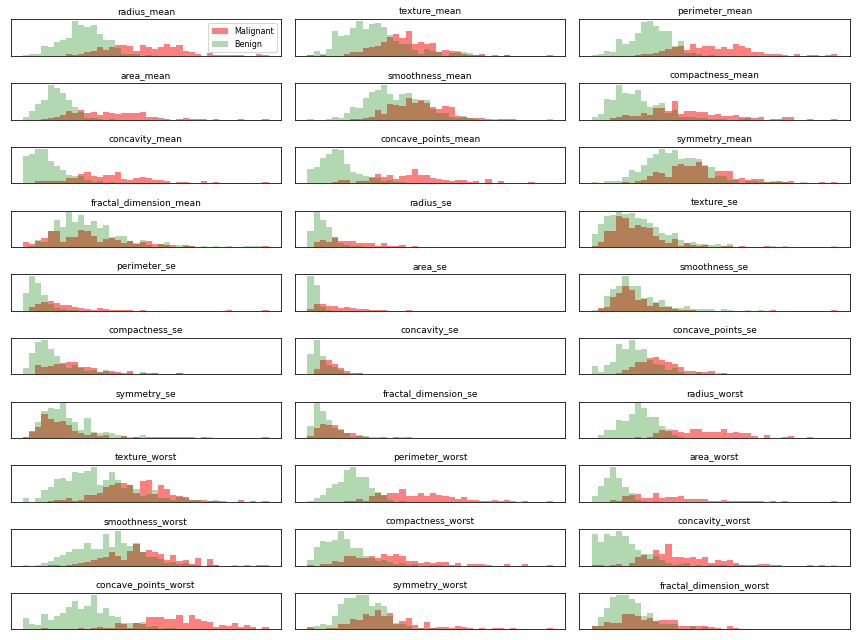

In [ ]:
fig,axes =plt.subplots(10,3, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
malignant=data[data.diagnosis=='Malignant'] # define malignant
benign=data[data.diagnosis=='Benign'] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(30):
  _,bins=np.histogram(data.iloc[:,i+1],bins=40)
  ax[i].hist(malignant.iloc[:,i+1],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(benign.iloc[:,i+1],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
  ax[i].set_title(data.columns[i+1],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['Malignant','Benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

**Feature selection**

For this section, a correlation graph will be drawn

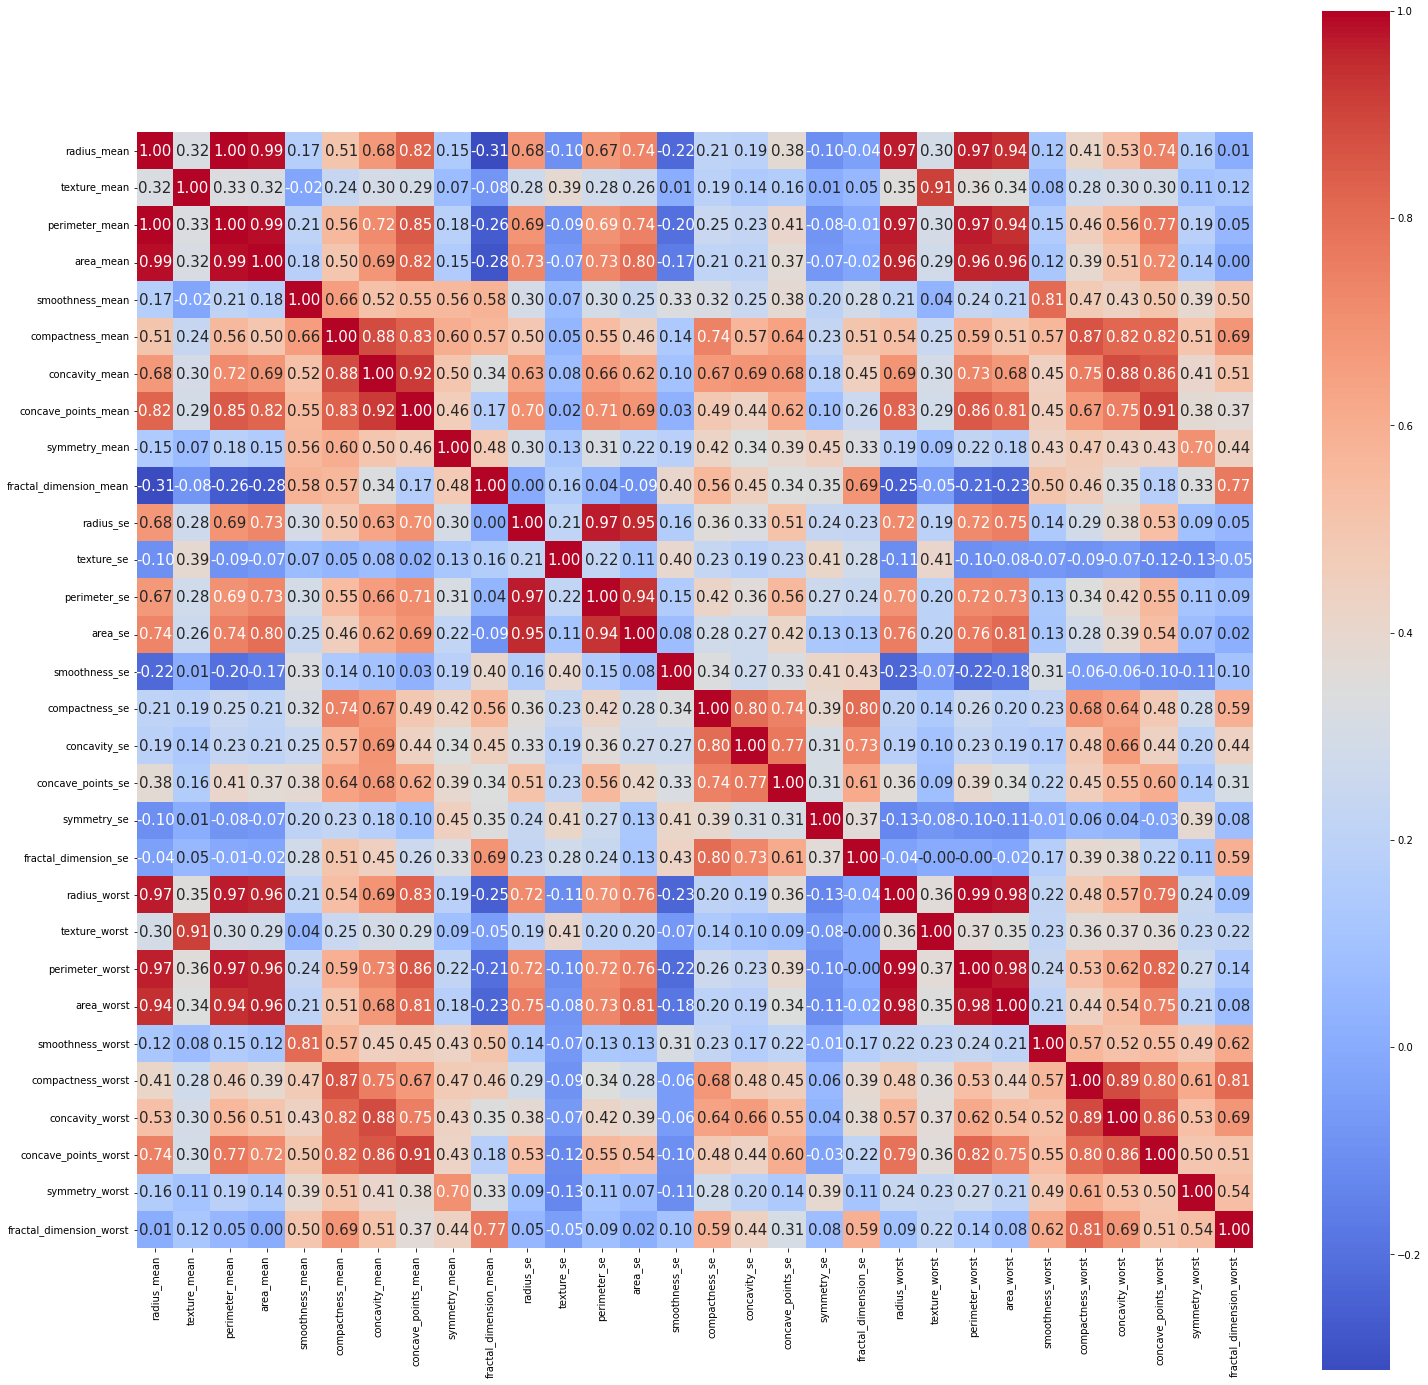

In [ ]:
corr = data[features].corr() # .corr is used for find corelation
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features,
           cmap= 'coolwarm')

Observations:


*   the *radius*, *perimeter* and *area* are highly correlated (this would be expected)
*   *compactness_mean*, *concavity_mean* and *concave_points_mean* are highly correlated
* all the *mean* values are correlated with the corresponding *worst* values




Now, let's take a look at 'slices' of 2D dependence for features_mean:

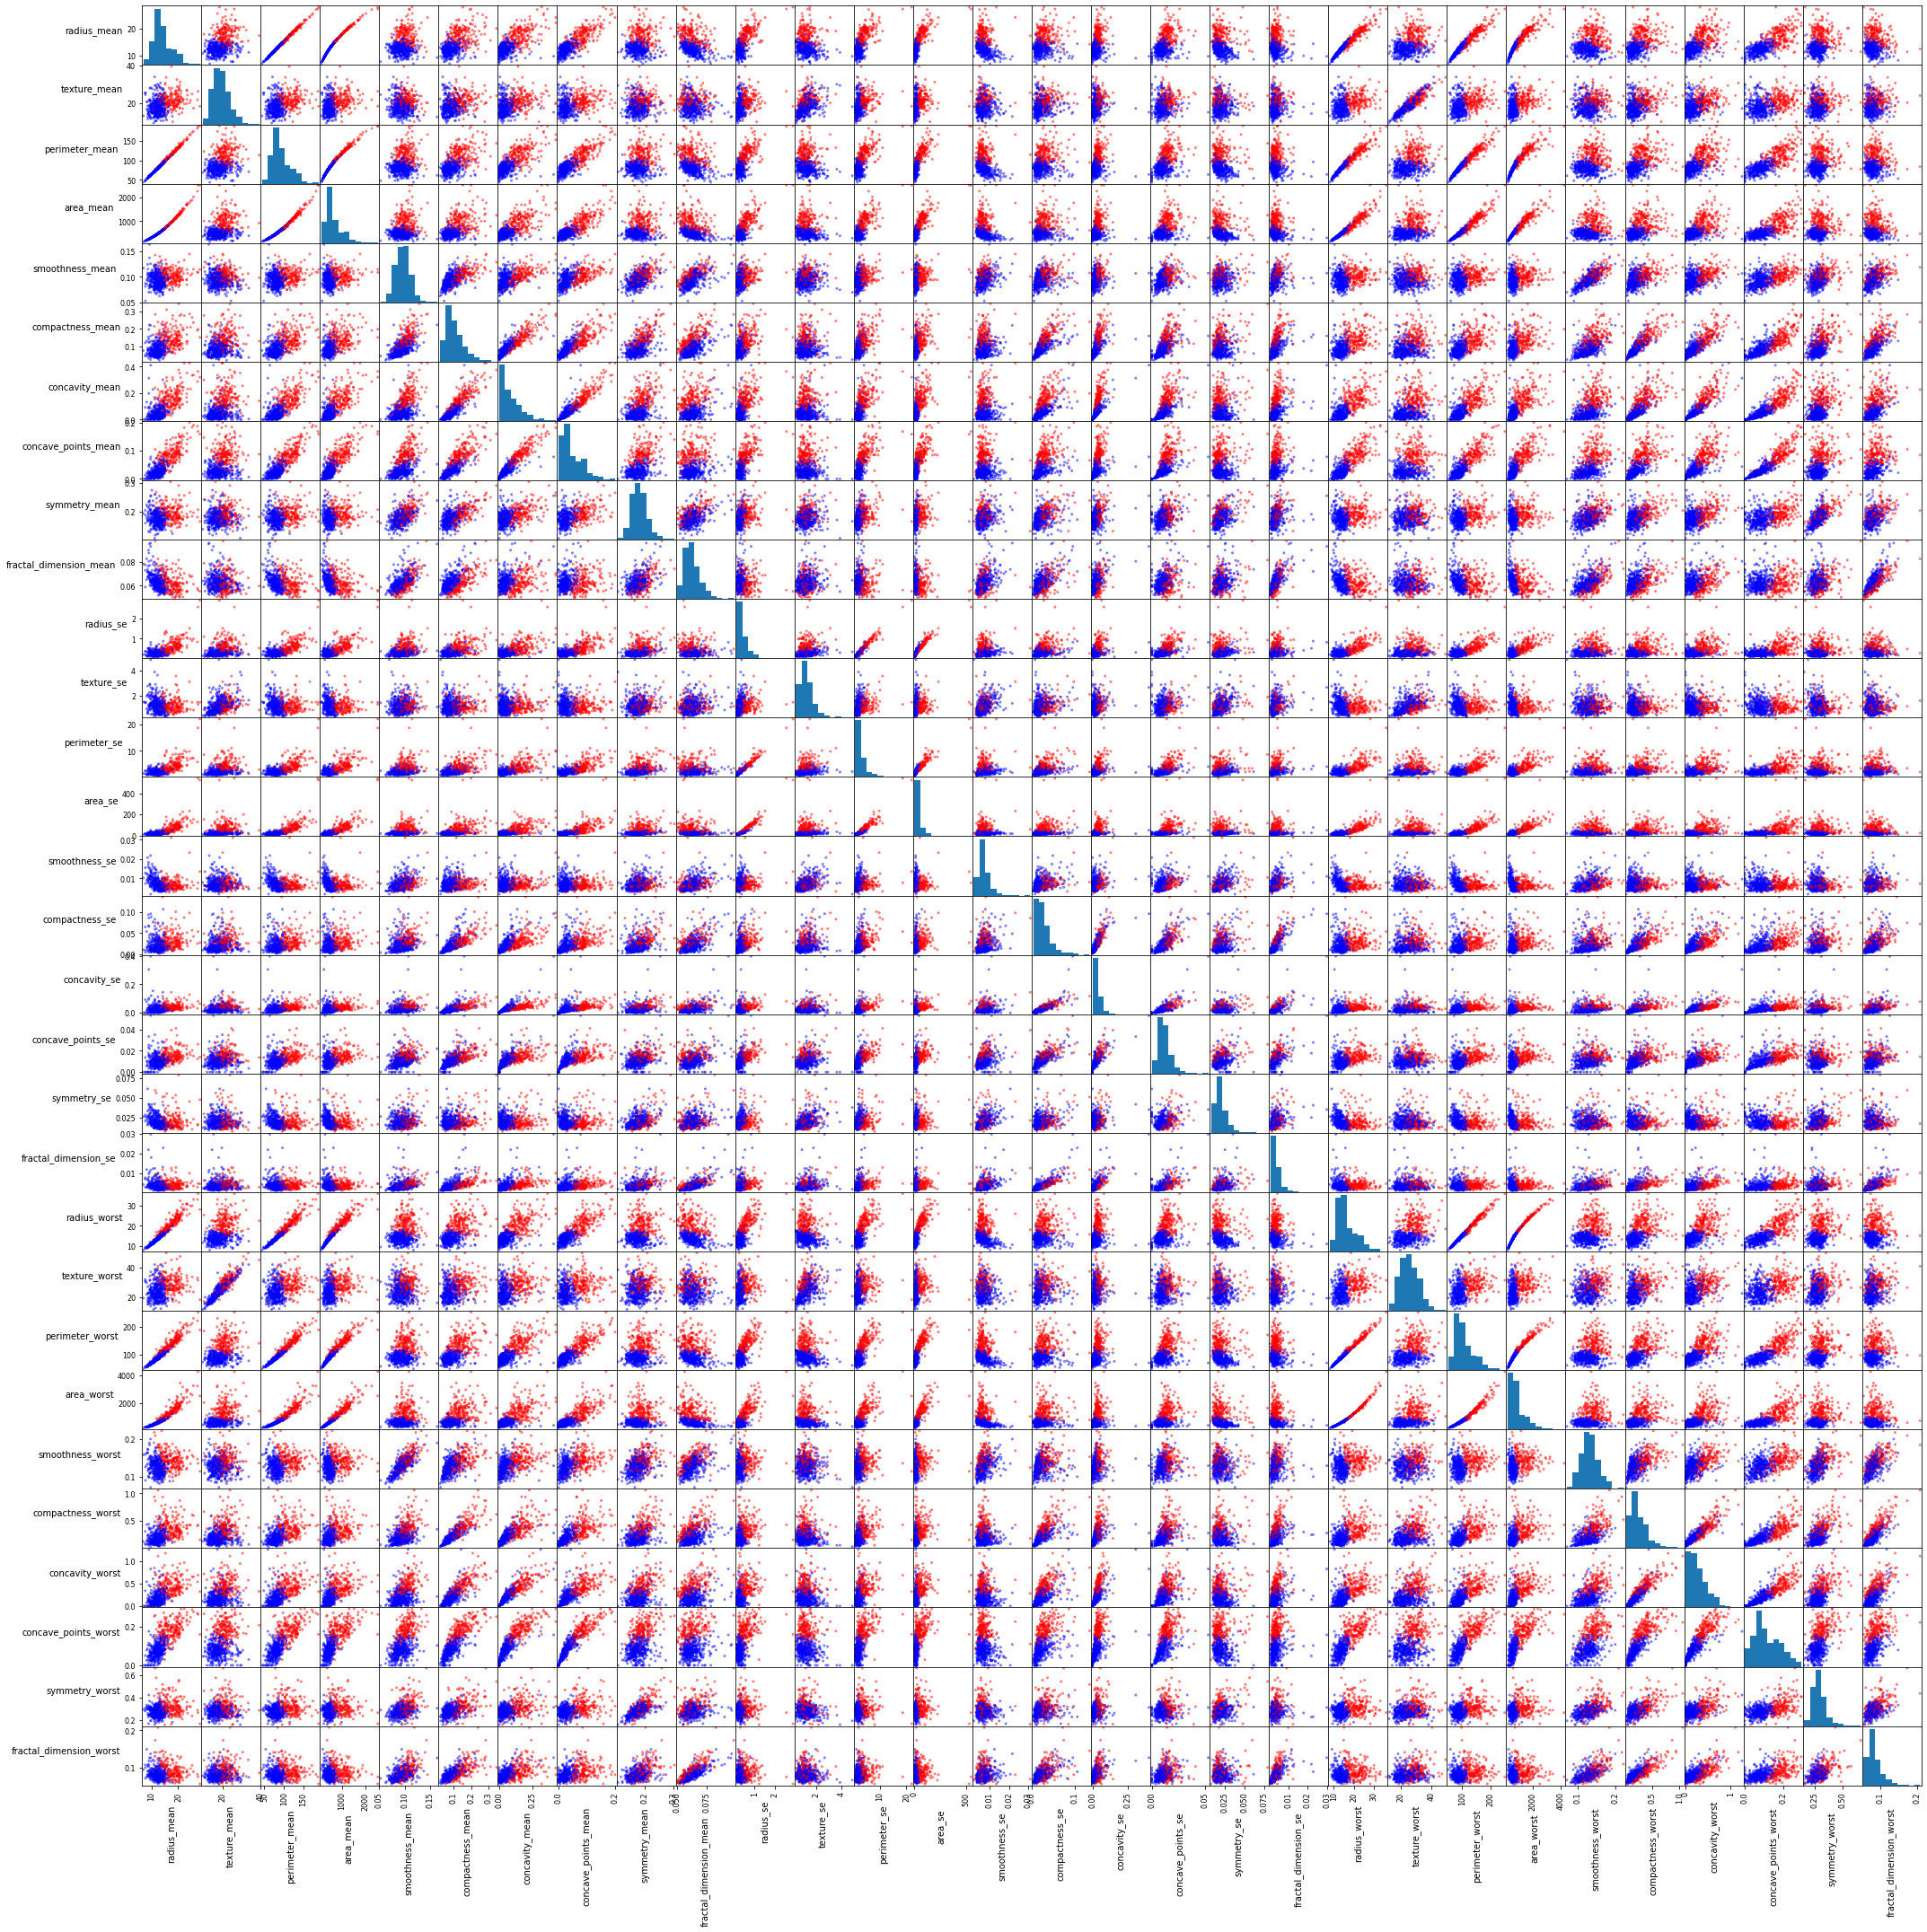

In [ ]:
color_function = {"Benign": "blue", "Malignant": "red"} # Here Red color will be M and blue B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
axes = scatter_matrix(data[features], c=colors, alpha = 0.5, figsize = (30, 30)); # plotting scatter plot matrix


for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

* Radius, area and perimeter have a strong linear relationship as expected 

* As graph shows, for the features like as texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean there is no separable plane

* In general, lots of information can be deduced from this scatter plot. It contains 900 plots! It is not surprising then that the simplification process in the form of Principal Component Analysis will be a proper way to 'squeeze' the data into a useful form.

The data needs to be standardized before feeding it to any of the models:

In [ ]:
data_features = data[features]

In [ ]:
data_features.shape

(569, 30)

In [ ]:
data_features

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave_points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [ ]:
data.diagnosis=data['diagnosis'].map({'Malignant':0,'Benign':1})
X_train, X_test, Y_train, Y_test = train_test_split(data_features, data.diagnosis, test_size=0.25, 
                                                    stratify=data.diagnosis, random_state=42)

print ("train feature shape: ", X_train.shape)
print ("test feature shape: ", X_test.shape)

train feature shape:  (426, 30)
test feature shape:  (143, 30)


My primary tests haven't used PCA - the maximum score I have obtained this way was 92% for the Decision Tree Classifier:

In [ ]:
def ADABoostThis(best_estimator,train_X,train_y,test_X,test_y):
  model = AdaBoostClassifier()
  base_estimator_range = [best_estimator]
  n_estimators_range = [100, 1000, 3000, 9000]
  algorithm_range = ['SAMME']
  param_grid = {'base_estimator': base_estimator_range, 'n_estimators': n_estimators_range, 
                'algorithm': algorithm_range}

  best_model, best_score = ScoringTheModel(model,param_grid,train_X,train_y,test_X,test_y)
  return (best_model, best_score)

In [ ]:
def BaggThis(best_estimator,train_X,train_y,test_X,test_y):
  model = BaggingClassifier()
  base_estimator_range = [best_estimator]
  max_features_range = list(range(1,7,1))
  max_samples_range = list(range(30, 150, 5))
  n_estimators_range = list(range(10,100,5))
  param_grid = {'base_estimator': base_estimator_range, 'max_features': max_features_range, 
                'max_samples': max_samples_range, 'n_estimators': n_estimators_range}

  best_model, best_score = ScoringTheModel(model,param_grid,train_X,train_y,test_X,test_y)
  return (best_model, best_score)

In [ ]:
def ScoringTheModel(model,param_grid,train_X,train_y, test_X, test_y):
    """The function for checking the best scores for a grid of parameters and a given model.
    Args:
      model - the model, that we want to check
      param_grid - the dictionary of parameters arrays that we want to check
      train_X, train_y, test_X, test_y - the data used for examining

    Returns:
      est - the best classifier for a given set of parameters
      score - the corresponding best score

    Note:   
      best_score is defined as in here: 
      https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

      best_score_float
        Mean cross-validated score of the best_estimator
    """
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    print(clf.best_params_)
    print("The best estimator is ")
    print(clf.best_estimator_)
    est = clf.best_estimator_
    name = str(clf.best_estimator_)
    
    print("The best score is ")
    print(clf.best_score_)
    score = clf.best_score_



    clf = clf.best_estimator_
    
    featimp = pd.Series(clf.feature_importances_, index=prediction_var).sort_values(ascending=False)
    print(featimp)

    #clf.fit(train_X,train_y)

    fig, ax = plt.subplots()    
    ZZ = clf.predict_proba(test_X)[:, 1]
    fpr, tpr, _ = roc_curve(test_y, ZZ)
    ax.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for ' + str(clf))
    auc = roc_auc_score(test_y, ZZ)
    ax.text(0.7, 0.5, ('AUC = %.2f' % auc),
            size=15, horizontalalignment='right')
    plt.show()    
    return (est, score)

In [ ]:
def CheckThisModel(clf, train_X, train_y, test_X, test_y):
  clf.fit(train_X,train_y)
  prediction=clf.predict(test_X) # predict for the test data
  accuracy = metrics.accuracy_score(prediction,test_y) # to check the accuracy  
  return accuracy

In [ ]:
def MyGridSearch(pipe_steps, check_params):
  """ Conducts all steps from pipe_steps dictionary with parameters from check_params.
      This function also prints the 4-fold and 5-fold scores for the dataset and prints the confusion matrix. 
  """
  pipeline = Pipeline(pipe_steps)
  print("Start Fitting Training Data")
  for cv in tqdm(range(4,6)):
      create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
      create_grid.fit(X_train, Y_train)
      print()
      print("score for %d fold CV := %4.3f" %(cv, create_grid.score(X_test, Y_test)))
      print("Best-Fit Parameters From Training Data:")
      print(create_grid.best_params_)

  print("out of the loop")
  print("grid best params: ", create_grid.best_params_) 
  # use the best one
  Y_pred = create_grid.predict(X_test)
# print (Y_pred)
  cm = confusion_matrix(Y_test, Y_pred)
  print("Confusion Matrix: \n")
  print(cm)


  df_cm = pd.DataFrame(cm, range(2), range(2))

  sns.heatmap(df_cm, annot=True, cbar=False)
  plt.title("Confusion Matrix", fontsize=14)
  plt.savefig("Confusion Matrix.png", dpi=200)

In [ ]:
def GetContours(my_model):
  """ * Performs the StandardScaler
      * Performs the PCA
      * Makes a fit of a model to the dataset
      * Plots the contours for the model
  """
  scaler1 = StandardScaler()
  scaler1.fit(X_test)
  X_test_scaled = scaler1.transform(X_test)


  pca2 = PCA(n_components=2)
  X_test_scaled_reduced = pca2.fit_transform(X_test_scaled)

  model = my_model

  classify = model.fit(X_test_scaled_reduced, Y_test)


  def plot_contours(ax, clf, xx, yy, **params):
      Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
      print ('initial decision function shape; ', np.shape(Z))
      Z = Z.reshape(xx.shape)
      print ('after reshape: ', np.shape(Z))
      out = ax.contourf(xx, yy, Z, **params)
      return out

  def make_meshgrid(x, y, h=.1):
      x_min, x_max = x.min() - 1, x.max() + 1
      y_min, y_max = y.min() - 1, y.max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))#,
                          #np.arange(z_min, z_max, h))
      return xx, yy

  X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  fig, ax = plt.subplots(figsize=(12,9))
  fig.patch.set_facecolor('white')
  cdict1={0:'lime',1:'deeppink'}

  Y_tar_list = Y_test.tolist()
  yl1= [int(target1) for target1 in Y_tar_list]
  labels1=yl1
  
  labl1={0:'Malignant',1:'Benign'}
  marker1={0:'*',1:'d'}
  alpha1={0:.8, 1:0.5}

  for l1 in np.unique(labels1):
      ix1=np.where(labels1==l1)
      ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

  if "SVC" in str(my_model):
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=30, facecolors='none', 
              edgecolors='navy', label='Support Vectors')

  plot_contours(ax, classify, xx, yy,cmap='seismic', alpha=0.4)
  plt.legend(fontsize=15)

  plt.xlabel("1st Principal Component",fontsize=14)
  plt.ylabel("2nd Principal Component",fontsize=14)

  #plt.savefig('ClassifyMalignant_Benign2D_Decs_FunctG10.png', dpi=300)
  plt.show()

**Applying Optuna!**

In [ ]:
! pip install optuna
import optuna
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm

     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 81 kB 9.3 MB/s 
     |████████████████████████████████| 210 kB 26.5 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 113 kB 51.8 MB/s 
     |████████████████████████████████| 146 kB 47.9 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=1b9450e87d5494cd42cd8250a8ee9672e4e891545b26e4f24074eb12d9c59526
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


Checking the simple DecisionTreeClassifier, Gaussian Naive Bayes and  KNeighborsClassifier:

In [ ]:
class Objective(object):
    def __init__(self, data):
        self.data = data

    def __call__(self, trial):
        x, y = self.data[features], self.data.diagnosis

        classifier_name = trial.suggest_categorical("classifier", ["DecisionTreeClassifier", "GaussianNB", "KNeighborsClassifier"])
        if classifier_name == "DecisionTreeClassifier":
            minsampspl = trial.suggest_int("min_samples_split", 2, 15, log=True)
            minsampleaf = trial.suggest_int("min_samples_leaf", 2, 15, log=True)
            maxfeatures = trial.suggest_categorical("max_features", ['auto', 'sqrt', 'log2'])
            classifier_obj = DecisionTreeClassifier(min_samples_split=minsampspl, min_samples_leaf = minsampleaf, max_features = maxfeatures)
        elif classifier_name == "GaussianNB":    
            classifier_obj = GaussianNB()
        else: 
            nneigh = trial.suggest_int("n_neighbors", 1, 40, log=True)
            weig = trial.suggest_categorical("weights", ['uniform', 'distance'])
            lsize = trial.suggest_int("leaf_size", 1, 40, log=True)
            classifier_obj = KNeighborsClassifier(n_neighbors=nneigh, weights = weig, leaf_size = lsize)

        # else:
        #     rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        #     classifier_obj = sklearn.ensemble.RandomForestClassifier(
        #         max_depth=rf_max_depth, n_estimators=10
        #     )

        score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=5)
        accuracy = score.mean()
        return accuracy


if __name__ == "__main__":
    # Load the dataset in advance for reusing it each trial execution.
    #data = sklearn.datasets.load_iris()
    objective = Objective(data)

    study1 = optuna.create_study(direction="maximize")
    study1.optimize(objective, n_trials=1000)
    print(study1.best_trial)

[I 2022-04-22 10:31:52,015] A new study created in memory with name: no-name-925dc81c-aea2-4c14-a302-5ebb65de4270
[I 2022-04-22 10:31:53,554] Trial 0 finished with value: 0.9227138643067848 and parameters: {'classifier': 'DecisionTreeClassifier', 'min_samples_split': 6, 'min_samples_leaf': 11, 'max_features': 'log2'}. Best is trial 0 with value: 0.9227138643067848.
[I 2022-04-22 10:31:53,620] Trial 1 finished with value: 0.9279614966620089 and parameters: {'classifier': 'KNeighborsClassifier', 'n_neighbors': 19, 'weights': 'distance', 'leaf_size': 28}. Best is trial 1 with value: 0.9279614966620089.
[I 2022-04-22 10:31:53,672] Trial 2 finished with value: 0.9385188635305075 and parameters: {'classifier': 'GaussianNB'}. Best is trial 2 with value: 0.9385188635305075.
[I 2022-04-22 10:31:53,725] Trial 3 finished with value: 0.9191895668374477 and parameters: {'classifier': 'DecisionTreeClassifier', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 2 wi

FrozenTrial(number=170, values=[0.9525539512498058], datetime_start=datetime.datetime(2022, 4, 22, 10, 32, 4, 65065), datetime_complete=datetime.datetime(2022, 4, 22, 10, 32, 4, 122384), params={'classifier': 'DecisionTreeClassifier', 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}, distributions={'classifier': CategoricalDistribution(choices=('DecisionTreeClassifier', 'GaussianNB', 'KNeighborsClassifier')), 'min_samples_split': IntLogUniformDistribution(high=15, low=2, step=1), 'min_samples_leaf': IntLogUniformDistribution(high=15, low=2, step=1), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=170, state=TrialState.COMPLETE, value=None)


In [ ]:
print("Number of finished trials: {}".format(len(study1.trials)))

print("Best trial:")
trial = study1.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.9525539512498058
  Params: 
    classifier: DecisionTreeClassifier
    min_samples_split: 4
    min_samples_leaf: 3
    max_features: sqrt


In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study1)

In [ ]:
# from optuna.visualization import plot_parallel_coordinate

# plot_parallel_coordinate(study1)

In [ ]:
# from optuna.visualization import plot_contour

# plot_contour(study1)

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study1)

In [ ]:
# from optuna.visualization import plot_param_importances

# plot_param_importances(study1)

Now, the best result is used for the ADABoost and Bagging:

In [ ]:
# the ADABoost consideration
class Obj(object):
    def __init__(self, data):
        self.data = data

    def __call__(self, trial):
        x, y = self.data[features], self.data.diagnosis

        classifier_name = trial.suggest_categorical("classifier", ["AdaBoostClassifier"])
        #best = trial.suggest_categorical("base_estimator", [])
        nestimators = trial.suggest_categorical("n_estimators", [6000])
        if classifier_name == "AdaBoostClassifier":
            classifier_obj = AdaBoostClassifier(n_estimators=nestimators, base_estimator = DecisionTreeClassifier(min_samples_split = 4, min_samples_leaf = 3, max_features = "sqrt"))

        score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=5)
        accuracy = score.mean()
        return accuracy


if __name__ == "__main__":
    # Load the dataset in advance for reusing it each trial execution.
    #data = sklearn.datasets.load_iris()
    objective = Obj(data)

    study2 = optuna.create_study(direction="maximize")
    study2.optimize(objective, n_trials=10)
    print(study2.best_trial)

[I 2022-04-22 10:33:35,630] A new study created in memory with name: no-name-5b87fcf6-8ffd-411f-83a5-ea772ba7d7ac
[I 2022-04-22 10:34:57,412] Trial 0 finished with value: 0.971883247942866 and parameters: {'classifier': 'AdaBoostClassifier', 'n_estimators': 6000}. Best is trial 0 with value: 0.971883247942866.
[I 2022-04-22 10:36:04,898] Trial 1 finished with value: 0.9736376339077782 and parameters: {'classifier': 'AdaBoostClassifier', 'n_estimators': 6000}. Best is trial 1 with value: 0.9736376339077782.
[I 2022-04-22 10:37:12,331] Trial 2 finished with value: 0.971883247942866 and parameters: {'classifier': 'AdaBoostClassifier', 'n_estimators': 6000}. Best is trial 1 with value: 0.9736376339077782.
[I 2022-04-22 10:38:18,738] Trial 3 finished with value: 0.971883247942866 and parameters: {'classifier': 'AdaBoostClassifier', 'n_estimators': 6000}. Best is trial 1 with value: 0.9736376339077782.
[I 2022-04-22 10:39:26,495] Trial 4 finished with value: 0.9736376339077782 and parameters

FrozenTrial(number=1, values=[0.9736376339077782], datetime_start=datetime.datetime(2022, 4, 22, 10, 34, 57, 421981), datetime_complete=datetime.datetime(2022, 4, 22, 10, 36, 4, 897528), params={'classifier': 'AdaBoostClassifier', 'n_estimators': 6000}, distributions={'classifier': CategoricalDistribution(choices=('AdaBoostClassifier',)), 'n_estimators': CategoricalDistribution(choices=(6000,))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=1, state=TrialState.COMPLETE, value=None)


In [ ]:
print("Number of finished trials: {}".format(len(study2.trials)))

print("Best trial:")
trial = study2.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

Number of finished trials: 10
Best trial:
  Value: 0.9736376339077782
  Params: 
    classifier: AdaBoostClassifier
    n_estimators: 6000


Bagging classifier for DTC:

In [ ]:
# the Bagging consideration
class Obj(object):
    def __init__(self, data):
        self.data = data

    def __call__(self, trial):
        x, y = self.data[features], self.data.diagnosis

        classifier_name = trial.suggest_categorical("classifier", ["BaggingClassifier"])
        nestimators = trial.suggest_categorical("n_estimators", [6000])
        if classifier_name == "BaggingClassifier":
            mfeatures = trial.suggest_int("max_features", 1, 40, log=True)
            msamples = trial.suggest_int("max_samples", 1, 200, log=True)
            classifier_obj = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split = 4, min_samples_leaf = 3, max_features = "sqrt"), max_features = mfeatures, max_samples = msamples, n_estimators = nestimators)

        score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=5)
        accuracy = score.mean()
        return accuracy


if __name__ == "__main__":
    # Load the dataset in advance for reusing it each trial execution.
    #data = sklearn.datasets.load_iris()
    objective = Obj(data)

    study3 = optuna.create_study(direction="maximize")
    study3.optimize(objective, n_trials=200)
    print(study3.best_trial)

[I 2022-04-22 10:45:00,088] A new study created in memory with name: no-name-ae0c4048-6aff-4efb-97d9-32572a3b6df2
[I 2022-04-22 10:45:45,212] Trial 0 finished with value: 0.9385033379909953 and parameters: {'classifier': 'BaggingClassifier', 'n_estimators': 6000, 'max_features': 3, 'max_samples': 80}. Best is trial 0 with value: 0.9385033379909953.
[I 2022-04-22 10:46:28,909] Trial 1 finished with value: 0.9244837758112094 and parameters: {'classifier': 'BaggingClassifier', 'n_estimators': 6000, 'max_features': 1, 'max_samples': 30}. Best is trial 0 with value: 0.9385033379909953.
[I 2022-04-22 10:47:18,775] Trial 2 finished with value: 0.9525694767893184 and parameters: {'classifier': 'BaggingClassifier', 'n_estimators': 6000, 'max_features': 24, 'max_samples': 166}. Best is trial 2 with value: 0.9525694767893184.
[I 2022-04-22 10:48:02,873] Trial 3 finished with value: 0.6274181027790716 and parameters: {'classifier': 'BaggingClassifier', 'n_estimators': 6000, 'max_features': 13, 'ma

FrozenTrial(number=68, values=[0.956078248719143], datetime_start=datetime.datetime(2022, 4, 22, 11, 2, 42, 583584), datetime_complete=datetime.datetime(2022, 4, 22, 11, 3, 31, 555525), params={'classifier': 'BaggingClassifier', 'n_estimators': 6000, 'max_features': 30, 'max_samples': 121}, distributions={'classifier': CategoricalDistribution(choices=('BaggingClassifier',)), 'n_estimators': CategoricalDistribution(choices=(6000,)), 'max_features': IntLogUniformDistribution(high=40, low=1, step=1), 'max_samples': IntLogUniformDistribution(high=200, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=68, state=TrialState.COMPLETE, value=None)


In [ ]:
print("Number of finished trials: {}".format(len(study3.trials)))

print("Best trial:")
trial = study3.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

Number of finished trials: 200
Best trial:
  Value: 0.956078248719143
  Params: 
    classifier: BaggingClassifier
    n_estimators: 6000
    max_features: 30
    max_samples: 121


In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study3)

In [ ]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study3)

In [ ]:
# from optuna.visualization import plot_contour

# plot_contour(study3)

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study3)

In [ ]:
from optuna.visualization import plot_param_importances

plot_param_importances(study3)

The best result obtained so far was for AdaBoost for DecisionTreeClassifier(min_samples_split = 4, min_samples_leaf = 3, max_features = "sqrt") and 6000 estimators.

Score for 5-fold: 0.9736376339077782

That's over 97%!

The problem is, it cannot be visualized in one plot! (30 features)

It is thus succeptible to some unforseen errors.

Let's check whether we will improve our results when applying the PCA!

**PCA application**


In [ ]:
# For PCA, First Need to Scale the Data.  
scaler1 = StandardScaler()
scaler1.fit(data_features)
feature_scaled = scaler1.transform(data_features)

# Now Apply PCA

pca1 = PCA(n_components=4)
pca1.fit(feature_scaled)
feature_scaled_pca = pca1.transform(feature_scaled)
print("shape of the scaled and 'PCA'ed features: ", np.shape(feature_scaled_pca))

shape of the scaled and 'PCA'ed features:  (569, 4)


In [ ]:
# Let's see the variance to see out of the 
# 4 components which are contributing most 

feat_var = np.var(feature_scaled_pca, axis=0)
feat_var_rat = feat_var/(np.sum(feat_var))

print ("Variance Ratio of the 4 Principal Components Ananlysis: ", feat_var_rat)

Variance Ratio of the 4 Principal Components Ananlysis:  [0.55871858 0.23941873 0.11854291 0.08331978]


<class 'list'>


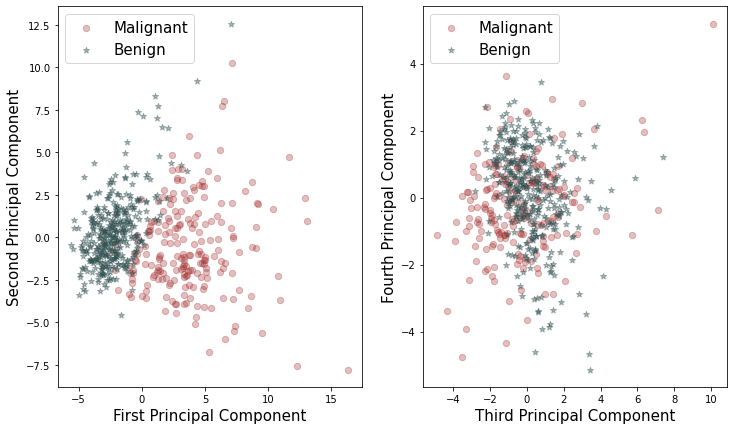

In [ ]:
#print (type(cancer.target))
data_diagnosis=data['diagnosis'] #.map({'Malignant':0,'Benign':1})

cancer_target_list = data_diagnosis.tolist()
print (type(cancer_target_list))
#print (cancer_target_list)
#print (type(yl))
feature_scaled_pca_X0 = feature_scaled_pca[:, 0]
feature_scaled_pca_X1 = feature_scaled_pca[:, 1]
feature_scaled_pca_X2 = feature_scaled_pca[:, 2]
feature_scaled_pca_X3 = feature_scaled_pca[:, 3]

labels = cancer_target_list
colordict = {0:'brown', 1:'darkslategray'}
piclabel = {0:'Malignant', 1:'Benign'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_scaled_pca_X0[ix], feature_scaled_pca_X1[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(1,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_scaled_pca_X2[ix1], feature_scaled_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Third Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)
# plt.savefig('Cancer_labels_PCAs.png', dpi=200)
plt.show()


Checking other components:

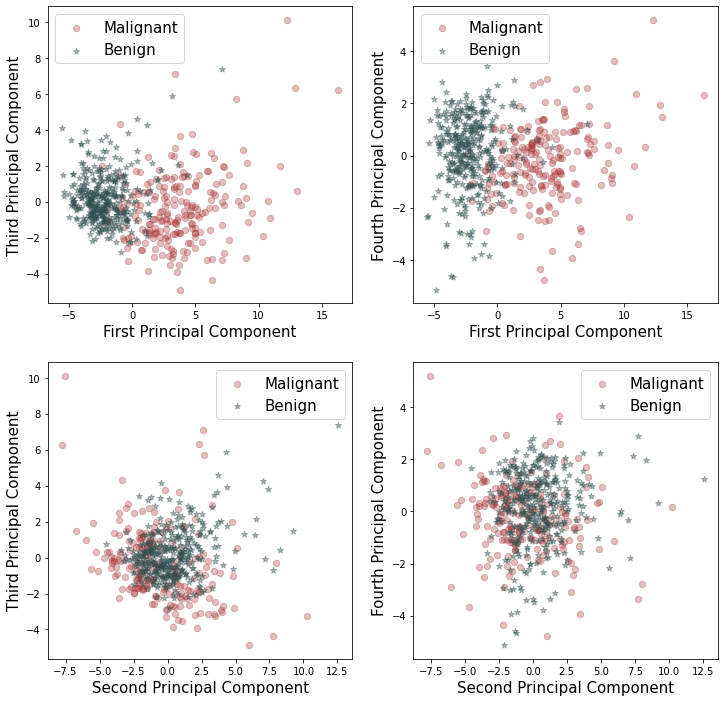

In [ ]:
fig = plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_scaled_pca_X0[ix], feature_scaled_pca_X2[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Third Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(2,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_scaled_pca_X0[ix1], feature_scaled_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)


plt.subplot(2,2,3)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_scaled_pca_X1[ix], feature_scaled_pca_X2[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("Second Principal Component", fontsize=15)
plt.ylabel("Third Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(2,2,4)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_scaled_pca_X1[ix1], feature_scaled_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Second Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)



Second and third principal components are highly codependent. Same goes for second and fourth component. Thus only first and second components should be used for this dataset.

Here, I will search through the several algorithms to obtain the best separation algorithm

Start Fitting Training Data


  0%|          | 0/2 [00:00<?, ?it/s]


score for 4 fold CV := 0.951
Best-Fit Parameters From Training Data:
{'DTC__max_features': 'auto', 'DTC__min_samples_leaf': 5, 'DTC__min_samples_split': 8, 'pca__n_components': 2}

score for 5 fold CV := 0.909
Best-Fit Parameters From Training Data:
{'DTC__max_features': 'sqrt', 'DTC__min_samples_leaf': 8, 'DTC__min_samples_split': 11, 'pca__n_components': 2}
out of the loop
grid best params:  {'DTC__max_features': 'sqrt', 'DTC__min_samples_leaf': 8, 'DTC__min_samples_split': 11, 'pca__n_components': 2}
Confusion Matrix: 

[[44  9]
 [ 4 86]]


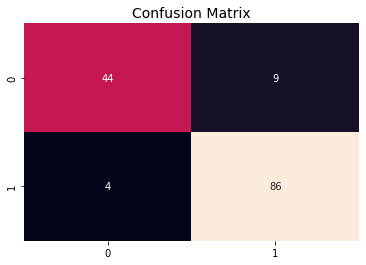

In [ ]:
pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('DTC', DecisionTreeClassifier())]

check_params= {
    'pca__n_components': [2], 
    'DTC__max_features': ['auto', 'sqrt', 'log2'], 
    'DTC__min_samples_split' : list(range(2,15)),
    'DTC__min_samples_leaf' : list(range(2,15))
}

MyGridSearch(pipe_steps, check_params)

The obtained score (0.909) is worse than the one obtained via using the DecisionTreeClassifier on whole dataset without PCA (0.952). Let's check whether applying the ADABoost changes things here:

Start Fitting Training Data


  0%|          | 0/2 [00:00<?, ?it/s]


score for 4 fold CV := 0.930
Best-Fit Parameters From Training Data:
{'AdaBoostAtDTC__base_estimator': DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=11), 'AdaBoostAtDTC__n_estimators': 9000, 'pca__n_components': 2}

score for 5 fold CV := 0.944
Best-Fit Parameters From Training Data:
{'AdaBoostAtDTC__base_estimator': DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=11), 'AdaBoostAtDTC__n_estimators': 9000, 'pca__n_components': 2}
out of the loop
grid best params:  {'AdaBoostAtDTC__base_estimator': DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=11), 'AdaBoostAtDTC__n_estimators': 9000, 'pca__n_components': 2}
Confusion Matrix: 

[[48  5]
 [ 3 87]]


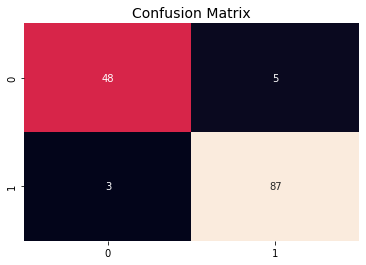

In [ ]:
pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('AdaBoostAtDTC', AdaBoostClassifier())]

check_params= {
    'pca__n_components': [2], 
    'AdaBoostAtDTC__n_estimators': [9000], 
    'AdaBoostAtDTC__base_estimator': [DecisionTreeClassifier(max_features = 'sqrt', min_samples_leaf = 8, min_samples_split = 11)]
}

MyGridSearch(pipe_steps, check_params)

AdaBoost on PCA-treated dataset gives a score of 0.944 compared to 0.974 for unchanged dataset.

initial decision function shape;  (41360,)
after reshape:  (176, 235)


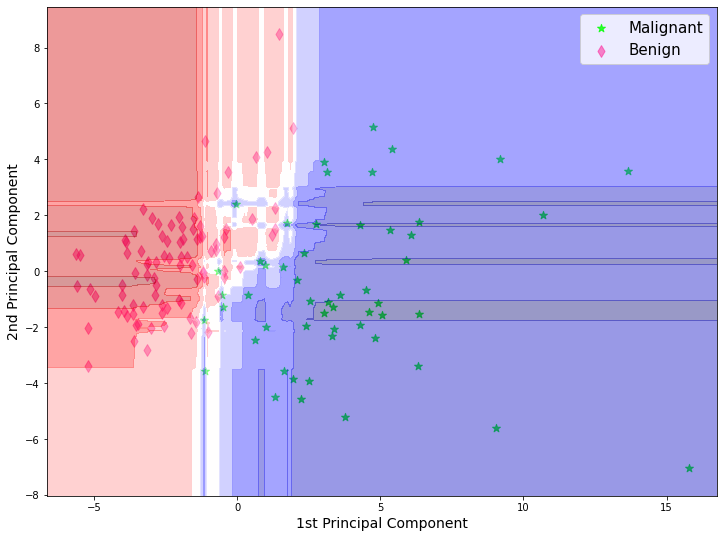

In [ ]:
GetContours(AdaBoostClassifier(DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=11), n_estimators = 9000))

This result may not be useful for larger statistics - there is a lot of empty spaces!

Now, let's check the SVC!

Start Fitting Training Data


  0%|          | 0/2 [00:00<?, ?it/s]


score for 4 fold CV := 0.937
Best-Fit Parameters From Training Data:
{'SupVM__C': 0.85, 'SupVM__gamma': 0.45, 'pca__n_components': 2}

score for 5 fold CV := 0.930
Best-Fit Parameters From Training Data:
{'SupVM__C': 500, 'SupVM__gamma': 0.03, 'pca__n_components': 2}
out of the loop
grid best params:  {'SupVM__C': 500, 'SupVM__gamma': 0.03, 'pca__n_components': 2}
Confusion Matrix: 

[[47  6]
 [ 4 86]]


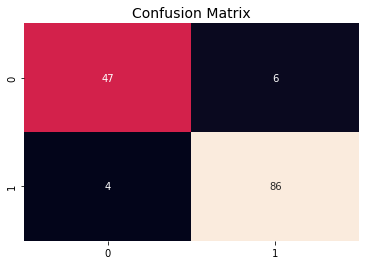

In [ ]:
# Pipeline Steps are StandardScaler, PCA and SVM 
pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SupVM', SVC(kernel='rbf'))]

check_params= {
    'pca__n_components': [2], 
    'SupVM__C': [0.1, 0.4, 0.455, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 10,30, 40, 50, 75, 100, 200, 300, 400, 450, 475, 500, 525, 550, 600, 700, 1000], 
    'SupVM__gamma' : [0.01, 0.02, 0.025, 0.029, 0.03, 0.032, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.07, 0.1, 0.2, 0.45, 0.5, 0.55, 1, 5, 10, 50]
}

MyGridSearch(pipe_steps, check_params)

The result is worse, but at least we can visualize our result in an convincing manner!

Best result for 5-fold:

initial decision function shape;  (41360,)
after reshape:  (176, 235)


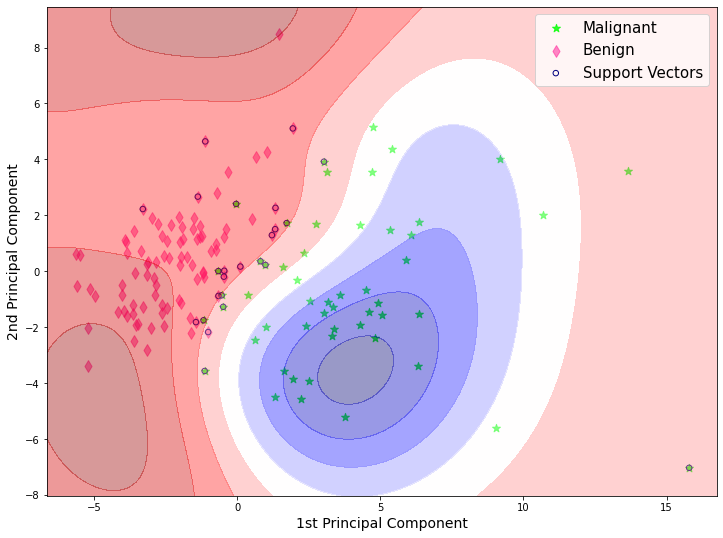

In [ ]:
GetContours(SVC(kernel='rbf', C = 500, gamma = 0.03))

Best result for 4-fold:

initial decision function shape;  (41360,)
after reshape:  (176, 235)


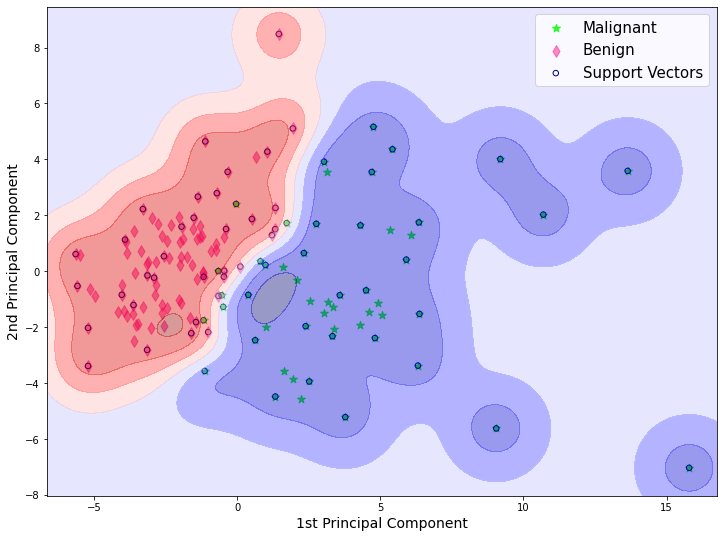

In [ ]:
GetContours(SVC(kernel='rbf', C = 0.85, gamma = 0.45))

That map looks very reasonable! PCA really helped in simplyfying the problem without the significant losses of the information!